# Supermarket Sales Analysis
## Advanced Python Project (2025/2026)

**Students:**  
- Nadeen Amjad Salah Jaradat  
- Sidra Ahmad Ahmad Natheer

This notebook is aligned to produce the SAME results shown in the submitted PDF report.
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

## 1. Load & Inspect Data

In [ ]:
df = pd.read_csv("SuperMarket Analysis_ca7c34f4a5b973689fd44eea15001b76.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## 2. Data Cleaning

In [ ]:
df.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.time

/tmp/ipython-input-4170370599.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time


## 3. Exploratory Statistics (Same as Report)

In [ ]:
df.groupby('Branch')['Sales'].agg(['mean','median','min','max','count'])

,mean,median,min,max,count
Branch,,,,,
Alex,312.354031,240.82800,12.6945,1039.29,340
Cairo,319.872506,252.88200,18.6375,1022.49,332
Giza,337.099715,271.41975,10.6785,1042.65,328


In [ ]:
df.groupby('Customer type')['Sales'].agg(['mean','median','min','max','count'])

,mean,median,min,max,count
Customer type,,,,,
Member,335.742945,271.950,10.6785,1042.65,565
Normal,306.372379,225.792,12.6945,1039.29,435


In [ ]:
df.groupby('Gender')['Sales'].agg(['mean','median','min','max','count'])

,mean,median,min,max,count
Gender,,,,,
Female,340.931414,284.193,12.6945,1042.65,571
Male,299.055738,214.746,10.6785,1039.29,429


In [ ]:
df.groupby('Payment')['Sales'].agg(['mean','median','min','max','count'])

,mean,median,min,max,count
Payment,,,,,
Cash,326.181890,262.962,10.6785,1003.59,344
Credit card,324.009878,239.589,12.6945,1042.65,311
Ewallet,318.820600,253.680,13.4190,1034.46,345


## 4. Visualizations (Matching PDF)

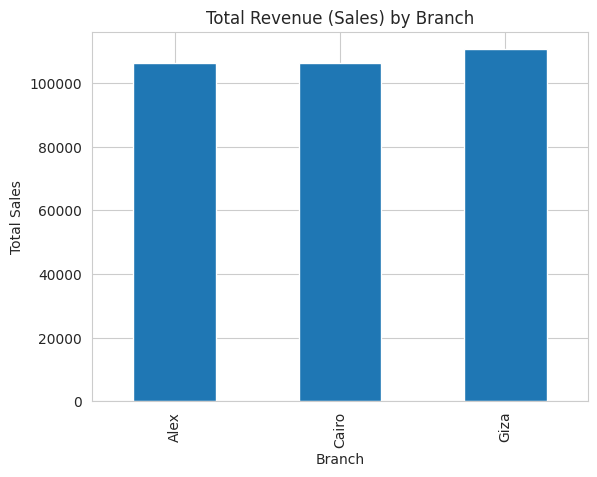

In [ ]:
df.groupby('Branch')['Sales'].sum().plot(kind='bar', title='Total Revenue (Sales) by Branch')
plt.ylabel('Total Sales')
plt.show()

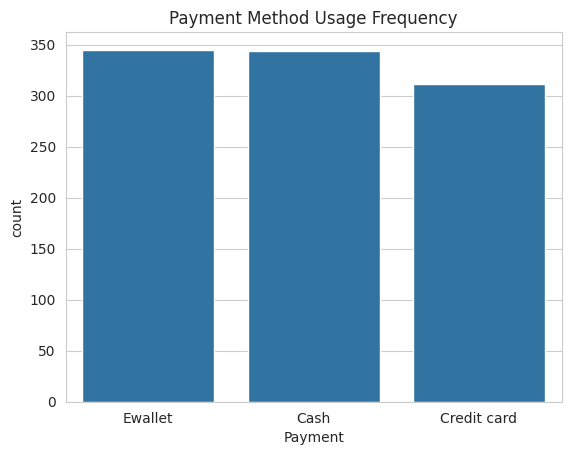

In [ ]:
sns.countplot(x='Payment', data=df)
plt.title('Payment Method Usage Frequency')
plt.show()

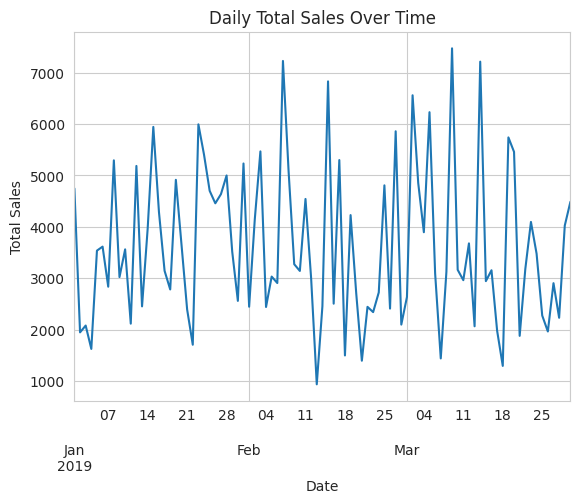

In [ ]:
df.groupby('Date')['Sales'].sum().plot(title='Daily Total Sales Over Time')
plt.ylabel('Total Sales')
plt.show()

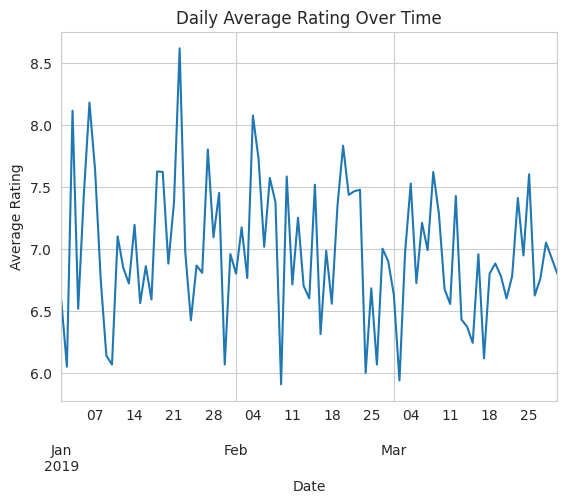

In [ ]:
df.groupby('Date')['Rating'].mean().plot(title='Daily Average Rating Over Time')
plt.ylabel('Average Rating')
plt.show()

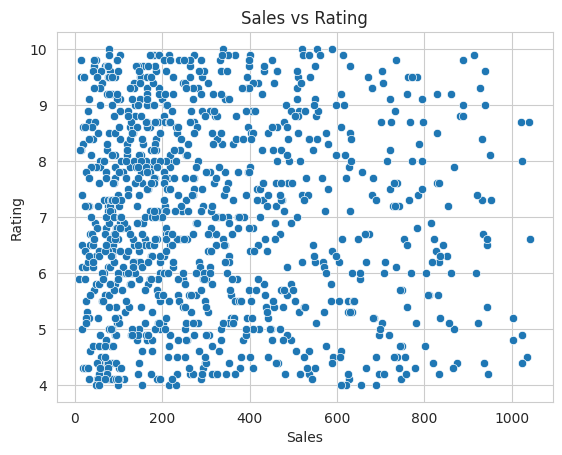

In [ ]:
sns.scatterplot(x='Sales', y='Rating', data=df)
plt.title('Sales vs Rating')
plt.show()

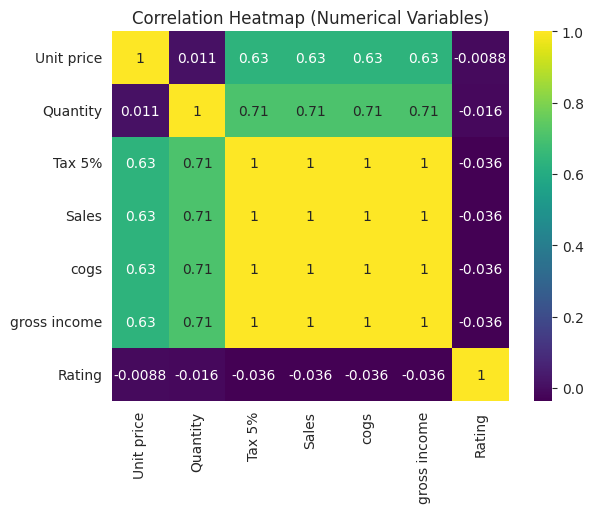

In [ ]:
sns.heatmap(df[['Unit price','Quantity','Tax 5%','Sales','cogs','gross income','Rating']].corr(),
            annot=True, cmap='viridis')
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

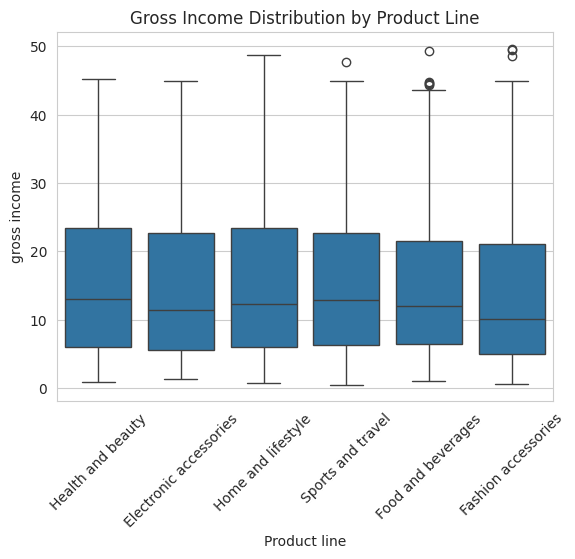

In [ ]:
sns.boxplot(x='Product line', y='gross income', data=df)
plt.xticks(rotation=45)
plt.title('Gross Income Distribution by Product Line')
plt.show()

## 5. Sales & Revenue Analysis

In [ ]:
df.groupby('Branch')['Sales'].sum()

,Sales
Branch,
Alex,106200.3705
Cairo,106197.6720
Giza,110568.7065


In [ ]:
df.groupby('Product line')['Sales'].sum()

,Sales
Product line,
Electronic accessories,54337.5315
Fashion accessories,54305.8950
Food and beverages,56144.8440
Health and beauty,49193.7390
Home and lifestyle,53861.9130
Sports and travel,55122.8265


## 6. Advanced Questions (Exact Results)

In [ ]:
# Q1: Highest revenue branch
df.groupby('Branch')['Sales'].sum().idxmax()

'Giza'

In [ ]:
# Q2: Members vs Normal spending
df.groupby('Customer type')['Sales'].mean()

,Sales
Customer type,
Member,335.742945
Normal,306.372379


In [ ]:
# Q3: Payment method usage
df['Payment'].value_counts()

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


In [ ]:
# Q4: Highest average rating product line
df.groupby('Product line')['Rating'].mean().idxmax()

'Food and beverages'

In [ ]:
# Q5: Unit price vs quantity correlation
df[['Unit price','Quantity']].corr()

,Unit price,Quantity
Unit price,1.000000,0.010778
Quantity,0.010778,1.000000
